In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam


In [2]:
path='C:/Users/vidha/Desktop/traffic/datasettraffic'

# Loading Data

In [3]:
features=[]
target=[]
print('Importing Folders...')
for i in range(43):
    folders=os.listdir(path+'/'+str(i))
    for name in folders:
        Img=cv2.imread(path+'/'+str(i)+'/'+name) #image as array
        features.append(Img)
        target.append(i)
    print(i,end=" ")
    
features=np.array(features)
target=np.array(target)

Importing Folders...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [4]:
X_train,Y_train,X_test,Y_test=train_test_split(features,target,test_size=0.3)

print('Data shapes:')
print("Training data: ",X_train.shape)
print("Testing data: ",Y_train.shape)

Data shapes:
Training data:  (24343, 32, 32, 3)
Testing data:  (10433, 32, 32, 3)


# Preprocessing images

In [5]:
def preprocessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    #grayscale images
    img=img/255                                 #normalization
    return img

X_train=list(map(preprocessing,X_train))
Y_train=list(map(preprocessing,Y_train))

X_train =np.array(X_train)
Y_train =np.array(Y_train)

#Reshaping the images to single color channnel
X_train=X_train.reshape(24343,32,32,1)
Y_train=Y_train.reshape(10433,32,32,1)

print('After Preprocessing:')
print("Training data: ",X_train.shape)
print("Testing data: ",Y_train.shape)



After Preprocessing:
Training data:  (24343, 32, 32, 1)
Testing data:  (10433, 32, 32, 1)


In [6]:
#Image Data Generator
data=ImageDataGenerator(width_shift_range=0.1,
                       height_shift_range=0.1,
                       zoom_range=0.2,
                       shear_range=0.1,
                       rotation_range=10)
data.fit(X_train)

In [7]:
batches=data.flow(X_train,X_test,batch_size=30)
X_batch,y_batch=next(batches)

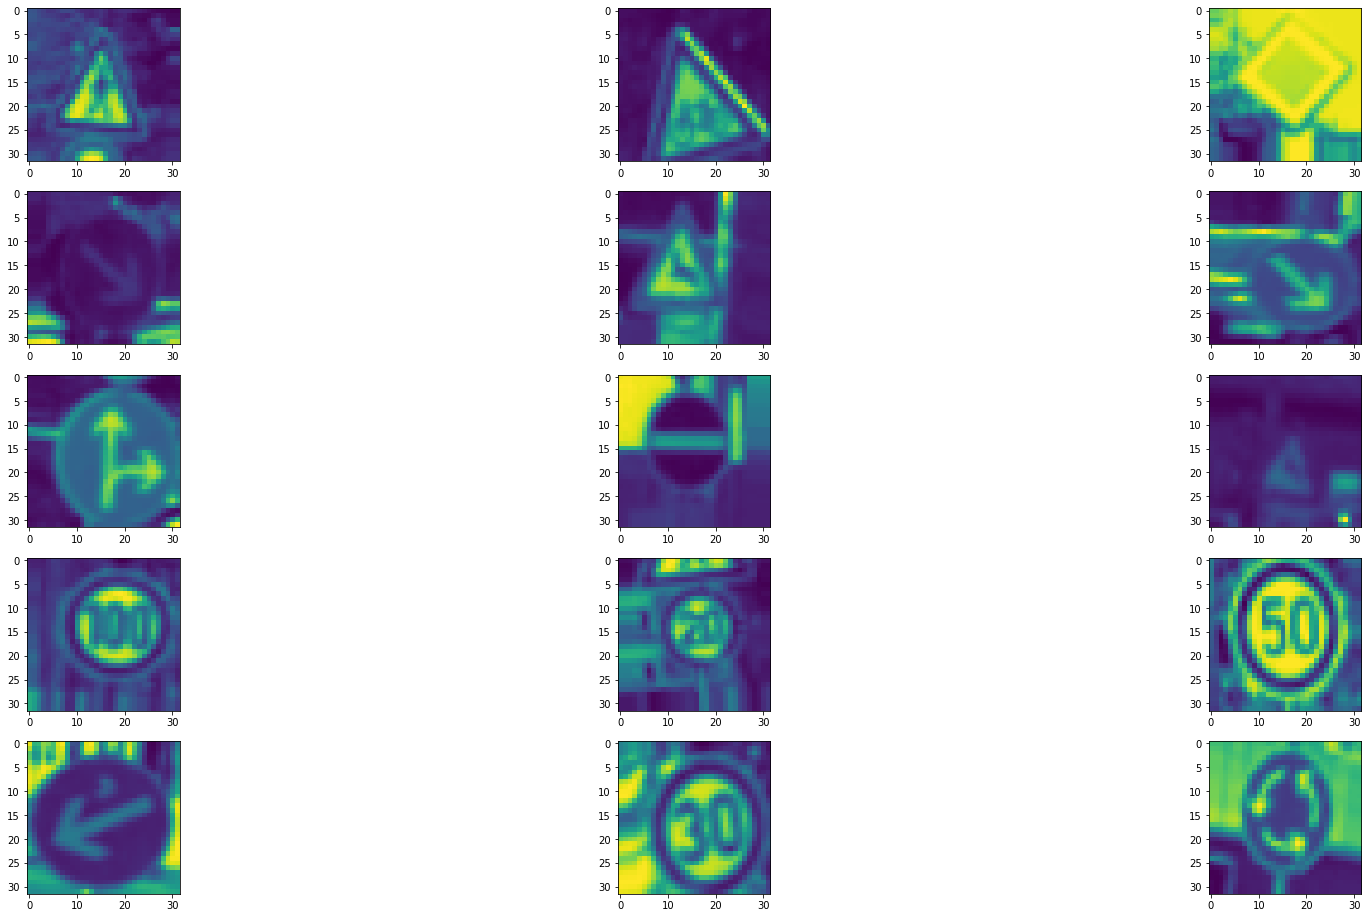

In [9]:
plt.figure(figsize=(30,50))
for i in range(15):
    plt.subplot(15,3,i+1)
    plt.imshow(X_batch[i].reshape((32,32)))
plt.show()

In [10]:
X_test=to_categorical(X_test,43)
Y_test=to_categorical(Y_test,43)


# Building the model

In [11]:
model=Sequential()
model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation="relu")) #sizeoffilter
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2))) #poolsize
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))

model.add(Dropout(0.5))
model.add(Dense(43,activation="softmax"))
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 30)          0

In [12]:
model.fit(data.flow(X_train,X_test,batch_size=30),epochs=15)

Epoch 1/15
812/812 [==============================] - 135s 166ms/step - loss: 3.3054 - accuracy: 0.1098
Epoch 2/15
812/812 [==============================] - 136s 168ms/step - loss: 1.4744 - accuracy: 0.5441
Epoch 3/15
812/812 [==============================] - 139s 171ms/step - loss: 0.8589 - accuracy: 0.7403
Epoch 4/15
812/812 [==============================] - 135s 167ms/step - loss: 0.6496 - accuracy: 0.7992
Epoch 5/15
812/812 [==============================] - 130s 159ms/step - loss: 0.5113 - accuracy: 0.8440
Epoch 6/15
812/812 [==============================] - 137s 168ms/step - loss: 0.4435 - accuracy: 0.8652
Epoch 7/15
812/812 [==============================] - 136s 167ms/step - loss: 0.3868 - accuracy: 0.8807
Epoch 8/15
812/812 [==============================] - 122s 150ms/step - loss: 0.3321 - accuracy: 0.8995
Epoch 9/15
812/812 [==============================] - 132s 163ms/step - loss: 0.3069 - accuracy: 0.9059
Epoch 10/15
812/812 [==============================] - 129s 159m

In [13]:
model.save("my_model.h5")

In [14]:
print(model.evaluate(Y_train,Y_test))

327/327 [==============================] - 14s 42ms/step - loss: 0.0239 - accuracy: 0.9931
[0.023925594985485077, 0.993098795413971]
